# 0 자료 정리

In [1]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/pfcvma/econ-python/main/to_pickle.csv"
df_raw = pd.read_csv(url)

> 이전 과제4에서 `MinMaxScaler`를 사용하여 Scaling을 완료함. 따라서 이번 과제에서는 scaling 생략

In [3]:
df_raw

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0.0,0.090909,0.477737,0.110550,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1,0.0,1.000000,0.725417,0.857550,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,2,1.0,0.363636,0.766234,0.358395,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,3,1.0,0.000000,0.648423,0.043442,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1
4,4,1.0,0.000000,0.554731,0.041065,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,3916,0.0,1.000000,0.112349,0.569258,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0
3917,3917,0.0,0.181818,0.087279,0.116396,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3918,3918,1.0,1.000000,0.951718,0.967515,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0
3919,3919,1.0,0.545455,0.368617,0.403056,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1


# 1  Decision tree

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = df_raw.drop('Churn',axis=1)
target = df_raw.Churn

In [8]:
# train / test 분류
seed = 42
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target, random_state = seed)

In [9]:
# fit the tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# feature importances
dtree.feature_importances_

array([0.15305792, 0.01679047, 0.1879642 , 0.20058107, 0.17543388,
       0.01770192, 0.02215524, 0.01353656, 0.        , 0.01531443,
       0.00950435, 0.01707182, 0.00797152, 0.02231338, 0.00802156,
       0.01188362, 0.01750494, 0.03486435, 0.01768136, 0.01272454,
       0.02965653, 0.00826637])

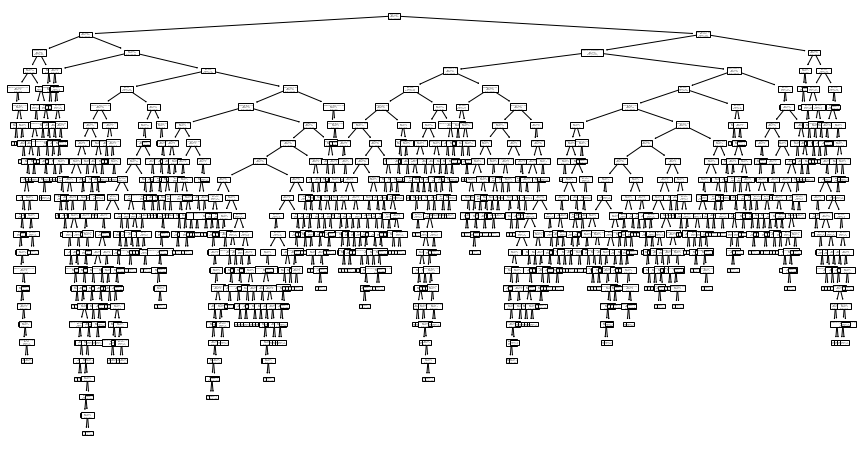

In [ ]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(15, 8))
_ = tree.plot_tree(dtree, feature_names=X_train.columns)

In [10]:
# parameters: path, ccp_alpha, max_depth
criterions = ['gini', 'entropy']
path = dtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
max_depths = [2,4,6,8]

In [11]:
# Base model은 k-fold cross-validation으로 훈련
# 5개의 fold를 구성합니다.
cv = KFold(n_splits=5)

In [12]:
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의
parameters = {'criterion':criterions,
              'max_depth':max_depths, 
              'ccp_alpha':ccp_alphas }

In [14]:
grid_tree = GridSearchCV(dtree,
                      param_grid = parameters, cv = cv, n_jobs= -1)

grid_tree.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.        , 0.00019841, 0.00022825, 0.00024202, 0.00024529,
       0.0002551 , 0.0002551 , 0.00026573, 0.00026573, 0.00026573,
       0.0002726 , 0.00027332, 0.00027332, 0.00027332, 0.00027332,
       0.00027332, 0.00027332, 0.00027332, 0.0002...
       0.00093414, 0.0009849 , 0.00102102, 0.00103847, 0.00104644,
       0.00105933, 0.00106777, 0.00115292, 0.00119655, 0.00131263,
       0.00135401, 0.00136552, 0.00136986, 0.00140303, 0.00145677,
       0.00167483, 0.00231531, 0.00232847, 0.00243992, 0.00282623,
       0.00341608, 0.00391523, 0.00739196, 0.00910813, 0.00985306,
       0.01577125, 0.07317665]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

In [15]:
# 가장 성능이 좋았던 파라미터를 출력합니다.
grid_tree.best_params_

{'ccp_alpha': 0.0010677683265110185, 'criterion': 'gini', 'max_depth': 6}

> criterion = 'gini', max_depth = 6, ccp_alpha = 0.00107 가 Best parameters

In [16]:
# 가장 성능이 좋았던 파라미터로 수행한 모델을 저장합니다.
best_dtree = grid_tree.best_estimator_

# 가장 좋은 성능을 보여준 모델의 결과를 출력합니다.
best_dtree.score(X_test, y_test).round(2)

0.74

In [17]:
pred = best_dtree.predict(X_test)

In [18]:
cfm = confusion_matrix(y_test, pred)
print(cfm)

[[412 102]
 [104 167]]


In [19]:
# 테스트 데이터셋에 대한 성과측정
print('Accuracy : %.2f' % accuracy_score(y_test, pred))
print('Precision : %.2f' % precision_score(y_test, pred))
print('Recall : %.2f' % recall_score(y_test, pred))
print('F1 : %.2f' % f1_score(y_test, pred))

Accuracy : 0.74
Precision : 0.62
Recall : 0.62
F1 : 0.62


> 성과가 뛰어난 편은 아니다.

In [20]:
result = pd.DataFrame(grid_tree.cv_results_['params'])
result['mean_test_score'] = grid_tree.cv_results_['mean_test_score']

# 결과값을 내림차순으로 정의. 즉 맨 위의 행이 가장 mean test score가 뛰어난 결과값
result.sort_values(by='mean_test_score', ascending=False)

,ccp_alpha,criterion,max_depth,mean_test_score
2130,0.001068,gini,6,0.748407
2163,0.001354,gini,8,0.748407
2122,0.001059,gini,6,0.748088
2114,0.001046,gini,6,0.748088
2138,0.001153,gini,6,0.748088
...,...,...,...,...
3,0.000000,gini,8,0.726402
2288,0.073177,gini,2,0.697061
2289,0.073177,gini,4,0.697061
2290,0.073177,gini,6,0.697061


# 2  Ensemble

* Ensemble모형에서 사용하는 기본 단위모형을 base model 혹은 weak learner라고 부르며, 성능이 우수한 모형이나 ensemble model 자체를 strong learner이라고 부르기도 한다.

  * weak learner은 overfitting의 우려가 없는, random guess보다 (살짝) 나은 모형을 의미한다.
    * Stump, k-Nearest Neighbors, Naive Bayes
  * strong learner는 weak learner에 비해 월등한 성과를 보이는 모형을 의미한다.
    * logistic regression, SVM
  * ensemble method는 weak learner들을 strong learner로 바꾸는 것이다.
  
* 훈련과정과 최종결과를 얻는 과정에 따라 bagging, boosting, stacking으로 구분한다.

## 2.1  Bagging

#### 랜덤 포레스트의 하이퍼 파라미터

* n_estimators: 결정 트리의 개수를 의미합니다. 디폴트값은 10개입니다. 계속 증가시킨다고 해서 성능이 무조건 향상되는 것은 아닙니다.(개수의 수가 늘어날수록 수행 시간이 오래 걸린다는 것을 감안하여야 합니다.)

* max_features: 결정 트리의 max_features 파라미터와 동일합니다. 랜덤 포레스트에서는 디폴트 값이 'auto'입니다.  auto: sqrt(전체 피처 개수)

* 결정 트리와 동일하게 과적합 개선을 위해서 max_depth와 min_samples_leaf가 사용이 됩니다.
 

In [21]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [22]:
data = df_raw.drop('Churn',axis=1)
target = df_raw.Churn

In [23]:
# train / test 분류
seed = 42
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, stratify=target, random_state = seed)

In [24]:
# instantiate the classifier 
rfc = RandomForestClassifier(
    criterion='entropy',
    n_estimators=100,
    n_jobs=-1,
    max_depth=100,
    random_state=42
    )
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

> The number of estimators is equivalent to the parameter described for Random Forest. Base estimators is the model type of the underlying models. In sklearn learn, the default base estimator is decision stumps (decision trees with max_depth = 1).

> n_estimators로 base estimator(decision stump)의 수 지정.

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       770
           1       0.66      0.55      0.60       407

    accuracy                           0.75      1177
   macro avg       0.72      0.70      0.71      1177
weighted avg       0.74      0.75      0.74      1177



In [26]:
# create the classifier with n_estimators = 100
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores[:10]

TotalCharges                      0.196353
MonthlyCharges                    0.152299
Unnamed: 0                        0.136194
tenure                            0.116742
TechSupport_Yes                   0.034413
Contract_Two year                 0.032507
OnlineSecurity_Yes                0.029662
PaymentMethod_Electronic check    0.029337
gender_Male                       0.027016
OnlineBackup_Yes                  0.026135
dtype: float64

In [27]:
# confusion matrix
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

[[655 115]
 [183 224]]


In [28]:
print('총 테스트 개수: %d, 오류 개수: %d' %(len(y_test), (y_test != y_pred).sum()))

총 테스트 개수: 1177, 오류 개수: 298


In [29]:
# 테스트 데이터셋에 대한 성과측정
print('Accuracy : %.2f' % accuracy_score(y_test, y_pred))
print('Precision : %.2f' % precision_score(y_test, y_pred))
print('Recall : %.2f' % recall_score(y_test, y_pred))
print('F1 : %.2f' % f1_score(y_test, y_pred))

Accuracy : 0.75
Precision : 0.66
Recall : 0.55
F1 : 0.60


> Decision Tree에 비해 눈에 띄게 개선되지 않았다.

## 2.2  Adaboost

#### AdaBoost의 하이퍼파라미터
* base_estimators

  * 학습에 사용하는 알고리즘
  * default : None → DecisionTreeClassifier(max_depth = 1) 이 적용

* n_estimators

  * 생성할 약한 학습기의 개수를 지정

  * default : 50

* learning_rate

  * 학습을 진행할 때마다 적용하는 학습률(0~1 사이의 값)
  * 약한 학습기가 순차적으로 오류값을 보정해나갈 때 적용하는 계수
  * default : 1
  * 낮은만큼 최소 손실값을 찾아 예측 성능이 높아질 수 있음
  * 하지만 그 만큼 많은 수의 트리가 필요하고 시간이 많이 소요

> n_estimators 를 늘린다면 생성되는 약한 학습기의 수는 늘어납니다. 하지만 이 여러 학습기들의 decision boundary가 많아지면서 모델이 복잡해집니다.

> learning_rate 을 줄인다면, 가중치의 갱신 변동폭이 감소해서, 여러 학습기들의 decision boundary의 차이가 줄어듭니다.

> 이 두 파라미터를 잘 조정하는 것이 AdaBoost 하이퍼 파라미터 튜닝의 핵심입니다.

In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
data = df_raw.drop('Churn',axis=1)
target = df_raw.Churn

In [32]:
# train / test 분류
seed = 42
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target, random_state = seed)

In [33]:
# AdaBoost를 위한 base model(weak learner) 설정
# decision stump: max_depth = 1
base_model = DecisionTreeClassifier(max_depth = 1, random_state=42)

> Weak learner로는 depth가 1인 decision stump을 많이 사용한다. sklearn default는 max_depth=3

In [34]:
# 모델 학습
ada_model = AdaBoostClassifier(
    base_estimator=base_model,
    random_state=42)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=42),
                   random_state=42)

In [35]:
# gridsearch를 위한 parameter 후보 설정
param = {
    'n_estimators' : [100, 300, 500], # 트리의 개수 : 100개 , 300개, 500개
    'learning_rate' : [0.01, 0.1, 1] # 학습률 : 0.01, 0.1, 1
}

In [36]:
# gridsearch : AdaBoost
grid_ada = GridSearchCV(ada_model,
                      param_grid = param, cv = cv, n_jobs= -1)

grid_ada.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                                random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [100, 300, 500]})

In [37]:
# 가장 성능이 좋았던 파라미터를 출력합니다.
grid_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

> n_estimators = 300, learning_rate = 0.1 가 Best parameters

In [38]:
# 가장 성능이 좋았던 파라미터로 수행한 모델을 저장합니다.
best_ada = grid_ada.best_estimator_

# 가장 좋은 성능을 보여준 모델의 결과를 출력합니다.
best_ada.score(X_test, y_test).round(2)

0.74

In [39]:
# 평가
print("훈련 세트 평가(정확도) : {:.2f}".format(best_ada.score(X_train, y_train)))
print("테스트 세트 평가(정확도) : {:.2f}".format(best_ada.score(X_test, y_test)))

훈련 세트 평가(정확도) : 0.78
테스트 세트 평가(정확도) : 0.74


In [40]:
y_pred = best_ada.predict(X_test)

# confusion matrix
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

[[433  81]
 [124 147]]


In [41]:
print('총 테스트 개수: %d, 오류 개수: %d' %(len(y_test), (y_test != y_pred).sum()))

총 테스트 개수: 785, 오류 개수: 205


In [42]:
# 테스트 데이터셋에 대한 성과측정
print('Accuracy : %.2f' % accuracy_score(y_test, y_pred))
print('Precision : %.2f' % precision_score(y_test, y_pred))
print('Recall : %.2f' % recall_score(y_test, y_pred))
print('F1 : %.2f' % f1_score(y_test, y_pred))

Accuracy : 0.74
Precision : 0.64
Recall : 0.54
F1 : 0.59


> 성과가 좋은 편은 아니다.

## 2.3  XGBoost

#### 모델 파라미터
* n_estimators[default=100] : 트리 모델의 갯수 라고 생각하면 된다.

* early_stopping_rounds : 최대한 몇 개의 트리를 완성할 것인지 valid loss에 더이상 진전이 없다면 멈춘다. n_estimators가 높을 때 주로 사용하며 과적합을 방지해준다.

* learning_rate[default=0.1] : 학습 단계별로 이전 결과를 얼마나 반영할지 설정한다.
일반적으로는 0.01 ~ 0.2 사이의 값을 쓰며 너무 작게 하면 시간이 더 오래 걸리게 된다.

* min_child_weight[default=1] :
child 에서 필요한 모든 관측치에 대한 가중치의 최소합
이 값보다 샘플 수가 작으면 leaf node가 된다. 너무 크게 설정하면 Under-fitting 될 수 있다.

* max_depth[default=6] :
트리의 최대 깊이를 뜻하며 일반적으로 3~10의 값으로 한다.

* gamma[default=0] : 트리에서 추가적으로 가지를 나눌지 말지 결정하는 최소 손실 감소 값
값을 크게 설정할 수록 과적합이 감소하는 효과가 있다.

* subsample[default=1] : 각 트리마다 데이터 샘플링 비율 over-fitting방지
일반적으로 0.5 ~ 1을 사용

* colsample_bytree[default=1] : 각 트리마다 feature 샘플링 비율
일반적으로 0.5 ~ 1을 사용한다.

* reg_lambda [default=1] : L2 규제(Ridge)

* reg_alpha [default=0] : L1 규제(Lasso)

* scale_pos_weight[default = 1] : 데이터가 불균형 할때 사용
보통은 음성 데이터 수 / 양성 데이터 수 값으로 한다.

In [43]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from xgboost import XGBClassifier

In [45]:
data = df_raw.drop('Churn',axis=1)
target = df_raw.Churn

In [46]:
# train / test 분류
seed = 42
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target, random_state = seed)

In [47]:
xgb= XGBClassifier(cover=0, random_state = 42).fit(X_train, y_train)

> Regression과 classification 모두에서 weak learner는 leaf의 수를 제한한 restricted tree을 사용한다.

> XGBoost for Regression에서는 Number of residuals이 크기 때문에 `Cover`
 값이 커도 어느 정도 괜찮지만, Classification에서는 확률의 곱이다보니 `Cover` 에 따라 많은 leaf가 가지치기당하게 된다. 따라서 Classification에서는 `Cover`= 0 으로 셋팅하는 것이 좋다.

In [48]:
xgb_param_grid={
    'gamma' : [0,1,2],
    'max_depth':[3,4,5],
    'min_child_weight':[1,3],
    'colsample_bytree' : [0.8,0.9,1]
}

In [49]:
# score 종류는 acc, recall, f1_micro, f1_macro 등
grid_xgb=GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="accuracy", cv = cv, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(cover=0, random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1], 'gamma': [0, 1, 2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 3]},
             scoring='accuracy')

In [50]:
# 가장 성능이 좋았던 파라미터를 출력합니다.
grid_xgb.best_params_

{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 4, 'min_child_weight': 1}

> 'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 4, 'min_child_weight': 1 가 Best parameters

In [51]:
# 가장 성능이 좋았던 파라미터로 수행한 모델을 저장합니다.
best_xgb = grid_xgb.best_estimator_

# 가장 좋은 성능을 보여준 모델의 결과를 출력합니다.
best_xgb.score(X_test, y_test).round(2)

0.76

In [52]:
# 평가
print("훈련 세트 평가(정확도) : {:.2f}".format(best_xgb.score(X_train, y_train)))
print("테스트 세트 평가(정확도) : {:.2f}".format(best_xgb.score(X_test, y_test)))

훈련 세트 평가(정확도) : 0.81
테스트 세트 평가(정확도) : 0.76


In [53]:
pred = best_xgb.predict(X_test)

In [54]:
cfm_xgb = confusion_matrix(y_test, pred)
print(cfm_xgb)

[[436  78]
 [111 160]]


In [55]:
print('총 테스트 개수: %d, 오류 개수: %d' %(len(y_test), (y_test != y_pred).sum()))

총 테스트 개수: 785, 오류 개수: 205


In [56]:
# 테스트 데이터셋에 대한 성과측정
print('Accuracy : %.2f' % accuracy_score(y_test, pred))
print('Precision : %.2f' % precision_score(y_test, pred))
print('Recall : %.2f' % recall_score(y_test, pred))
print('F1 : %.2f' % f1_score(y_test, pred))

Accuracy : 0.76
Precision : 0.67
Recall : 0.59
F1 : 0.63


## 2.4  Stacking

#### base model 과 meta model의 선택
* Base model로는 보통 서로 다른 strong learner들을 사용
* 자료를 여러 측면으로 분석하기 위해 기본 가정들이 다른 모형을 사용하는 경우가 많다.
  * linear models, logistic regression, Naive Bayes, (decision trees), support vector machines, neural network
* meta model은 해석이 용이한 모형을 주로 사용한다.
  * regression meta model: Linear regression
  * classification meta model: Logistic regression

#### 훈련과정

1. 표본을 둘로 나누어 base model들과 meta model 훈련에 사용한다.
2. Base model은 k-fold cross-validation으로 훈련
3. Meta-model은 overfitting 문제를 완화시키기 위해 훈련을 마친 base model의 `sklearn.model_selection.cross_val_predict`로 예측한 값을 이용해 훈련시킨다.

> 위에서 DecisionTree, adaboost, xgboost를 Kfold로 학습시켰다. 학습시킨 모델을 그대로 Stacking의 base model로 활용한다. 추가로 MultinomialNB를 base model로 선정하였다.

> Meta model의 경우 Logistic Regression을 선정하였다.

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
mn = MultinomialNB().fit(X_train, y_train)

In [59]:
parameters = {
    'alpha': [0.25, 0.5, 0.75, 1],
    'fit_prior': [True, False]
}

In [60]:
grid_mn = GridSearchCV(mn,
                      param_grid = parameters, cv = cv, n_jobs = -1)

grid_mn.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.25, 0.5, 0.75, 1],
                         'fit_prior': [True, False]})

In [61]:
# 가장 성능이 좋았던 파라미터를 출력합니다.
grid_mn.best_params_

{'alpha': 1, 'fit_prior': True}

> 'alpha': 1, 'fit_prior': True 가 Best parameters

In [62]:
# 가장 성능이 좋았던 파라미터로 수행한 모델을 저장합니다.
best_mn = grid_mn.best_estimator_

# 가장 좋은 성능을 보여준 모델의 결과를 출력합니다.
best_mn.score(X_test, y_test)

0.7019108280254777

In [81]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [92]:
# 최종 Stacking 모델을 위한 Classifier 생성
# classification meta-model: Logistic regression
lr_final = LogisticRegression(C=10, solver='liblinear').fit(X_train, y_train)

In [93]:
estimators = [
     ('mn', best_mn),
     ('dt', best_dtree),
     ('ada', best_ada),
     ('xgb', best_xgb)
]

In [94]:
sclf = StackingClassifier(estimators=estimators,
                            final_estimator=lr_final,
                            cv=KFold()).fit(X_train, y_train)

**cv: int, cross-validation generator, iterable, or “prefit”, default=None**

Determines the cross-validation splitting strategy used in `cross_val_predict` to train `final_estimator`. Possible inputs for cv are:

* None, to use the default 5-fold cross validation,

* integer, to specify the number of folds in a (Stratified) KFold,

* An object to be used as a cross-validation generator,

* An iterable yielding train, test splits,

* `"prefit"` to assume the `estimators` are prefit. In this case, the estimators will not be refitted.

> cv를 조정해줌으로써 `final_estimator`인 Logistic Regression 모델에 `cross_val_predict`를 수행한다.

검색어: stackingclassifier cv cross validation

https://stackoverflow.com/questions/64546085/using-stackingclassifier-with-train-test-split-instead-of-cv

In [95]:
# Print the scores
print(f"Multinomial Naive Bayes model training Accuracy: {best_mn.score(X_train, y_train):0.2f}")
print(f"Multinomial Naive Bayes model test Accuracy: {best_mn.score(X_test, y_test):0.2f}")

print(f"\nDecision Tree model training Accuracy: {best_dtree.score(X_train, y_train):0.2f}")
print(f"Decision Tree model test Accuracy: {best_dtree.score(X_test, y_test):0.2f}")

print(f"\nAdaBoost model training Accuracy: {best_ada.score(X_train, y_train):0.2f}")
print(f"AdaBoost model test Accuracy: {best_ada.score(X_test, y_test):0.2f}")

print(f"\nXGBoost model training Accuracy: {best_xgb.score(X_train, y_train):0.2f}")
print(f"XGBoost model test Accuracy: {best_xgb.score(X_test, y_test):0.2f}")

Multinomial Naive Bayes model training Accuracy: 0.72
Multinomial Naive Bayes model test Accuracy: 0.70

Decision Tree model training Accuracy: 0.77
Decision Tree model test Accuracy: 0.74

AdaBoost model training Accuracy: 0.78
AdaBoost model test Accuracy: 0.74

XGBoost model training Accuracy: 0.81
XGBoost model test Accuracy: 0.76


In [96]:
print(f"Stacking classifier training Accuracy: {sclf.score(X_train, y_train):0.2f}")
print(f"Stacking classifier test Accuracy: {sclf.score(X_test, y_test):0.2f}")

Stacking classifier training Accuracy: 0.81
Stacking classifier test Accuracy: 0.76


> 최종 메타 모델에서 학습하고 예측한 결과, 정확도가 76%로 개별 모델 정확도의 평균치보다 향상되었다.